In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()


In [3]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data = raw_data
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


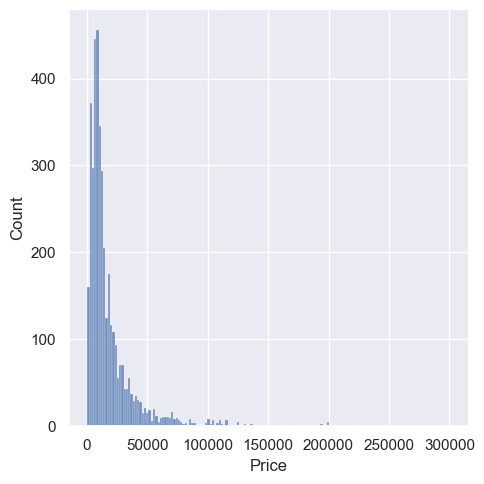

In [7]:
sns.displot(data_no_mv['Price'])

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\771842081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

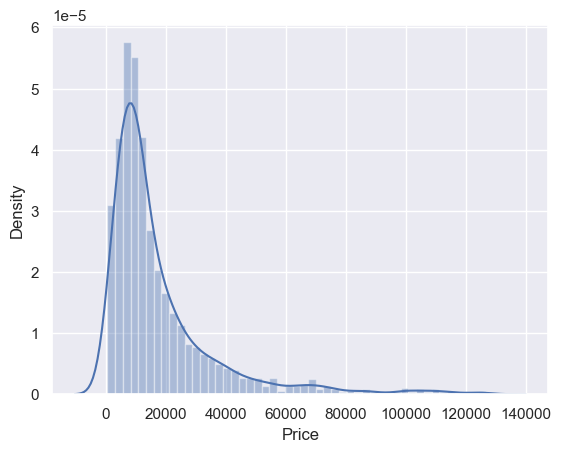

In [9]:
sns.distplot(data1['Price'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

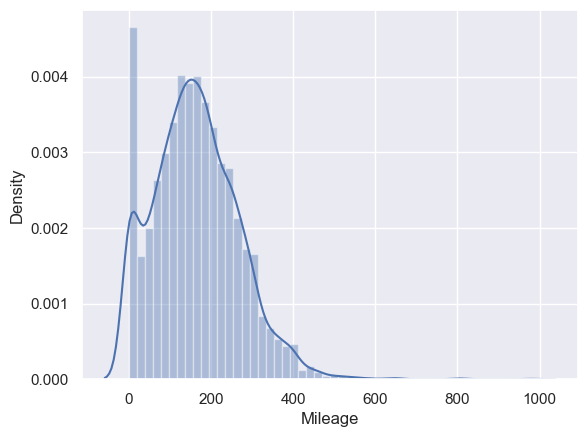

In [10]:
sns.distplot(data_no_mv['Mileage'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\1125305385.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

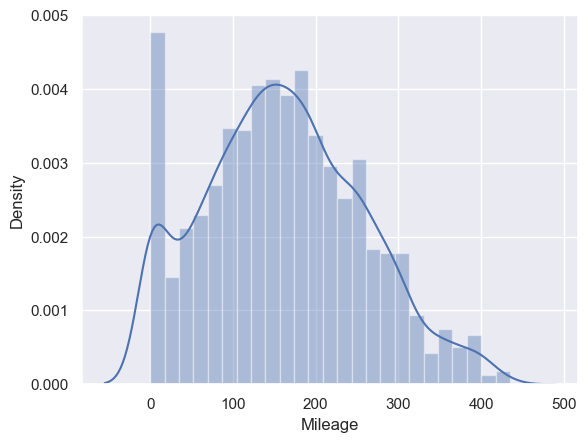

In [11]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q]

sns.distplot(data2['Mileage'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

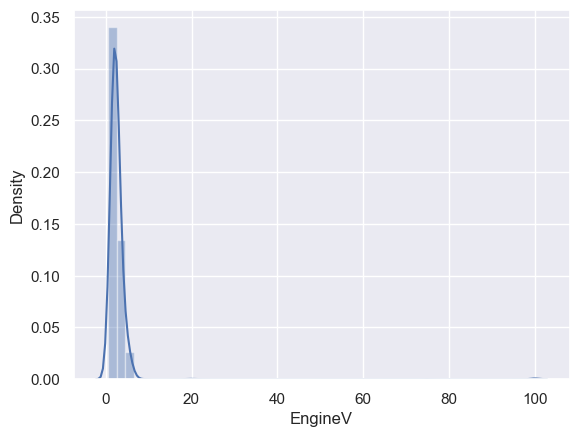

In [12]:
sns.distplot(data_no_mv['EngineV'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\557561483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

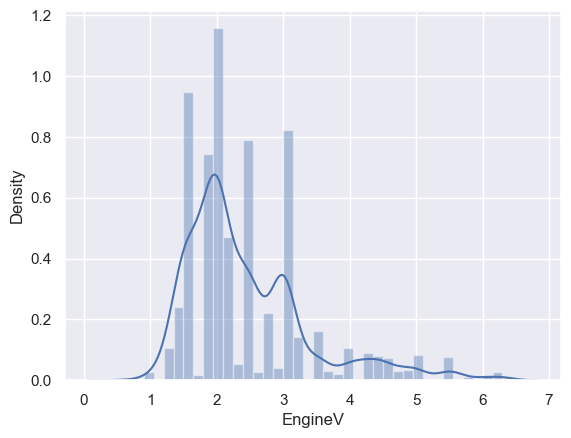

In [13]:
data3= data2[data2['EngineV']<6.5]
sns.distplot(data3['EngineV'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

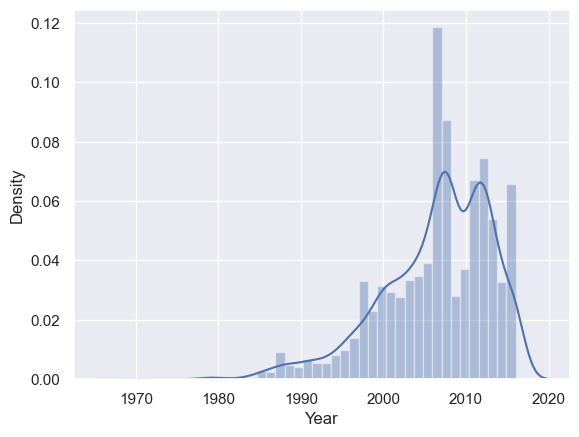

In [14]:
sns.distplot(data_no_mv['Year'])

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\3010447376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

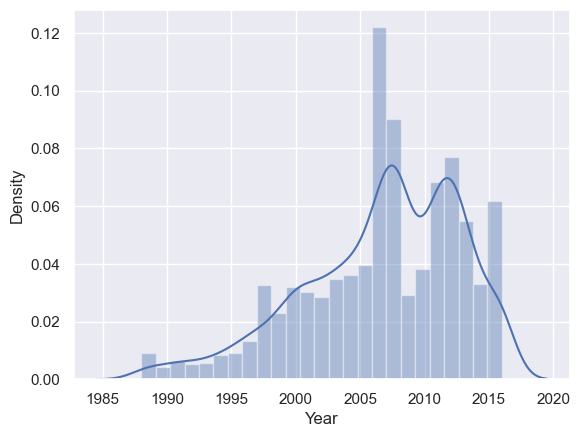

In [15]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]
sns.distplot(data4['Year'])

<Axes: ylabel='Model'>

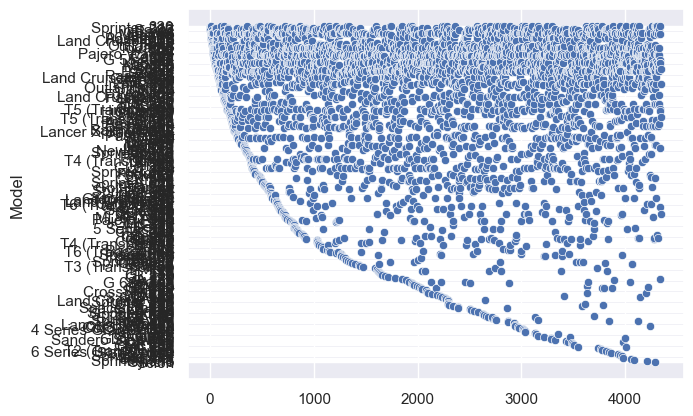

In [16]:
sns.scatterplot(data_no_mv['Model'])

In [17]:
data_cleaned = data4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


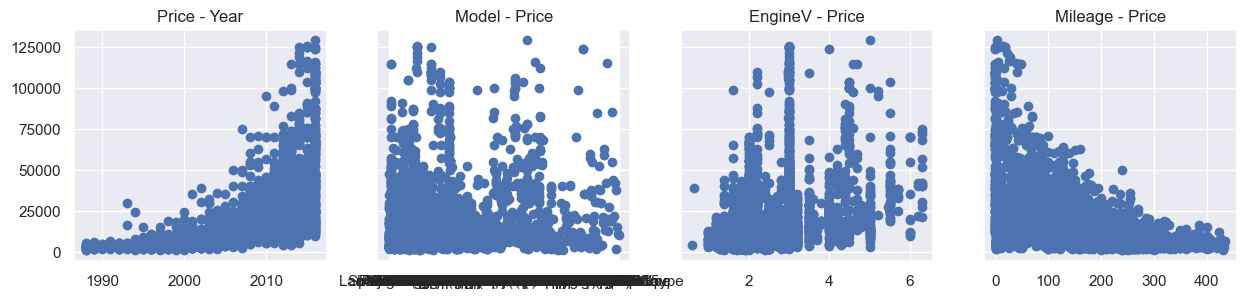

In [18]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price - Year')
ax2.scatter(data_cleaned['Model'], data_cleaned['Price'])
ax2.set_title('Model - Price')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('EngineV - Price')
ax4.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax4.set_title('Mileage - Price')

plt.show()

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

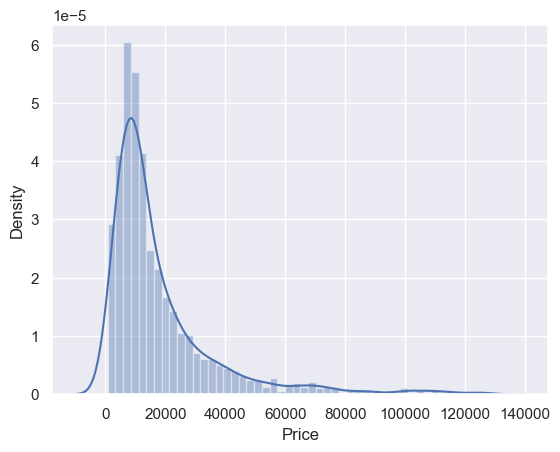

In [19]:
sns.distplot(data_cleaned['Price'])

In [20]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


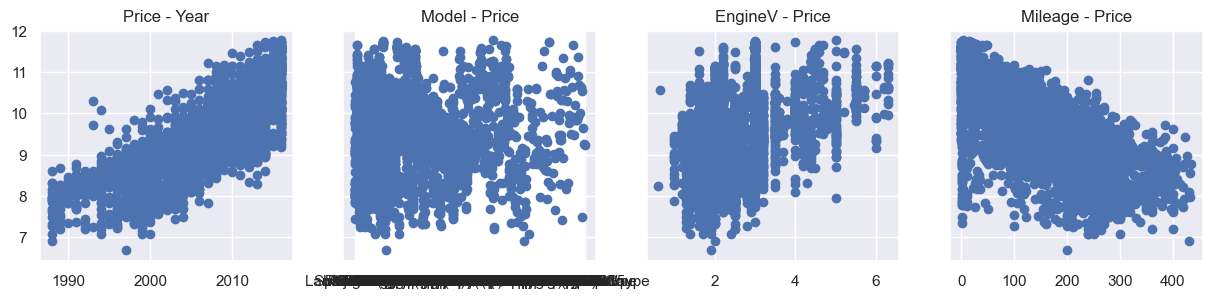

In [21]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price - Year')
ax2.scatter(data_cleaned['Model'], data_cleaned['log_price'])
ax2.set_title('Model - Price')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title('EngineV - Price')
ax4.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax4.set_title('Mileage - Price')

plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [23]:
dataWoMulticollinearity = data_cleaned.drop(['Year'], axis=1)
dataDummies = pd.get_dummies(dataWoMulticollinearity, drop_first=True)

dataDummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
dataDummies = dataDummies.astype(float)
dataDummies

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7900.0,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13300.0,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23000.0,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18300.0,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163.0,2.5,9.350102,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3863,17900.0,35.0,1.6,9.792556,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3864,125000.0,9.0,3.0,11.736069,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3865,6500.0,1.0,3.5,8.779557,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
targets = dataDummies['Price']
inputs = dataDummies.drop(['Price'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [27]:
inputs_scaled = scaler.transform(inputs)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [38]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
yHat = reg.predict(x_train)

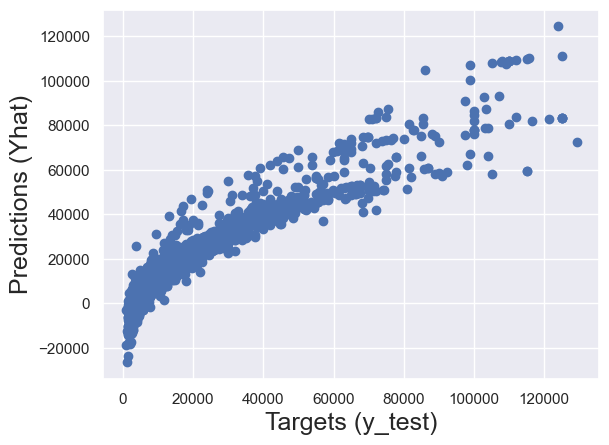

In [40]:
plt.scatter(y_train, yHat)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (Yhat)',size=18)
plt.show()

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\1190780774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yHat)


<Axes: xlabel='Price', ylabel='Density'>

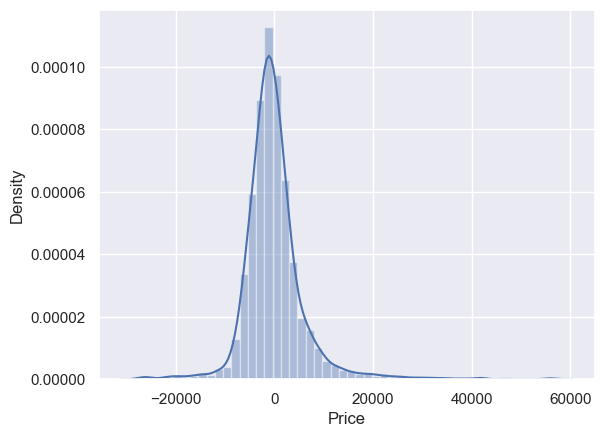

In [42]:
sns.distplot(y_train - yHat)

In [43]:
reg.score(x_train,y_train)

0.8876116114479563

In [44]:
reg.intercept_

4694574094396374.0

In [35]:
reg.coef_

array([-1.37985421e+03, -2.49013415e+03,  1.47758754e+04,  1.03876412e+17,
        1.11929468e+17, -5.21937060e+16,  3.68577242e+16,  1.63004988e+17,
        1.76230991e+17, -3.28000000e+02, -5.20000000e+02, -1.15200000e+03,
       -8.51000000e+02, -6.24000000e+02, -6.88000000e+02, -7.20000000e+01,
       -9.08000000e+02, -2.58400000e+03,  1.75525387e+16,  2.03494671e+17,
       -2.58000000e+02, -4.80000000e+02, -4.70000000e+01,  3.75989484e+15,
        4.13500000e+02,  2.45000000e+02, -1.20000000e+01, -1.98000000e+02,
        2.20000000e+02,  2.65899106e+15, -2.60000000e+01,  3.98000000e+02,
        1.06000000e+02, -1.80000000e+02, -6.66000000e+02, -1.18577477e+17,
       -2.29000000e+02, -4.00000000e+00, -2.22000000e+02,  3.39874773e+16,
        9.42500000e+01, -1.88000000e+02,  1.60804662e+17, -2.20000000e+01,
       -1.85000000e+01, -5.36000000e+02, -1.18000000e+02, -1.07528902e+17,
        1.14000000e+02, -2.24000000e+02, -4.12000000e+02,  1.00750000e+02,
        3.22000000e+02,  

In [36]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-1.379854e+03
1,EngineV,-2.490134e+03
2,log_price,1.477588e+04
3,Brand_BMW,1.038764e+17
4,Brand_Mercedes-Benz,1.119295e+17
...,...,...
303,Model_X6,3.480000e+02
304,Model_X6 M,5.700000e+02
305,Model_Yaris,-1.226845e+16
306,Model_Z3,-1.360000e+02


In [47]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [48]:
y_hat_test = reg.predict(x_test)

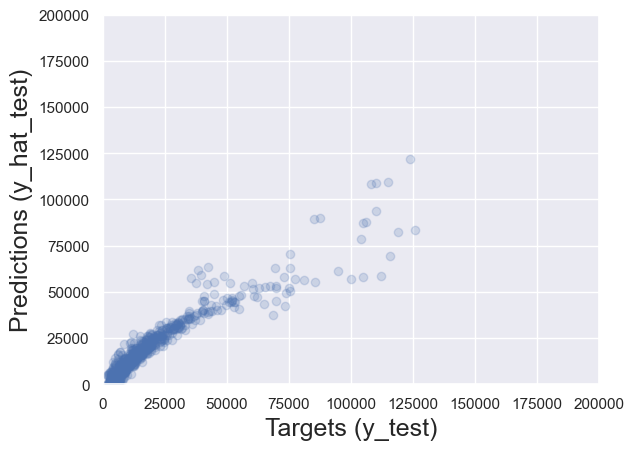

In [93]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0, 200000)
plt.ylim(0, 200000)
plt.show()

In [78]:
df_pf = pd.DataFrame(np.log(y_hat_test), columns=['Prediction'])
df_pf.head()

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\160109122.py:1: RuntimeWarning: invalid value encountered in log
  df_pf = pd.DataFrame(np.log(y_hat_test), columns=['Prediction'])


,Prediction
0,NaN
1,42.739193
2,8.634443
3,8.777401
4,9.201300


In [80]:
df_pf['Target'] = np.log(y_test)
df_pf

,Prediction,Target
0,NaN,NaN
1,42.739193,8.974618
2,8.634443,NaN
3,8.777401,NaN
4,9.201300,NaN
...,...,...
769,10.375676,8.846497
770,9.158415,NaN
771,9.890098,NaN
772,10.525944,NaN


In [76]:
np.log(y_hat_test)

C:\Users\marqu\AppData\Local\Temp\ipykernel_24336\3793431638.py:1: RuntimeWarning: invalid value encountered in log
  np.log(y_hat_test)


array([        nan, 42.73919297,  8.63444275,  8.77740129,  9.20129963,
       38.73987327, 43.75889611,  9.94530106,  9.81956232, 10.7189851 ,
        9.45014436,  7.90470391,  7.6118424 ,  9.77508584,  9.32420463,
        9.84860889, 10.008478  ,  9.39980304, 10.56921215, 10.02349034,
        9.665611  , 10.09995853,  8.44031215,  9.76226955,  9.89978069,
       10.33077938,  8.92824268,  9.82822507, 10.58996252, 11.06197124,
        8.84649694,  9.7323433 , 41.84857076,  9.83510164,  9.80730699,
        9.83681342,  9.47868671, 10.16854051,  9.84871453, 10.39102408,
        9.86547411,  9.75672617, 11.02955287, 10.19039432,  9.56085639,
        9.0347958 ,  7.09506438, 10.18678503, 10.61658441,  7.94520113,
               nan,         nan,  9.43108104, 10.11107067,  9.96203944,
        9.45641889,  9.34259595, 10.43146524, 10.66890888,  8.92903791,
        9.55860001,  9.07772285,  9.26388114,         nan,  9.66357925,
        9.88522174,  8.53895468,         nan,  8.27180403,      

In [57]:
y_test

1192     2300.0
3360     2800.0
2350     2500.0
3257     6400.0
892      9150.0
         ...   
1935    29500.0
3757     9600.0
3134    18300.0
1369    68500.0
2595    10800.0
Name: Price, Length: 774, dtype: float64

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [83]:
print("Mean absolute error ", mean_absolute_error(y_test, y_hat_test))
print("Mean squared error ", mean_squared_error(y_test, y_hat_test))
print("RMSE ", math.sqrt(mean_squared_error(y_test, y_hat_test)))

Mean absolute error  1.578417310516203e+17
Mean squared error  1.2479600095445025e+36
RMSE  1.1171213047581281e+18
